In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
data = pd.read_csv('/Users/ilya/Desktop/GitHub_Repositories/DataSets/properties_data.csv')

In [54]:
data.shape

(1905, 38)

In [55]:
data.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [56]:
data = data.set_index('id')

In [ ]:
data.c

In [89]:
data['neighborhood'].nunique()

54

In [57]:
data.head()

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,...,False,False,True,False,False,False,False,False,True,False
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,...,False,False,True,True,False,False,False,False,True,False
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,...,False,True,True,True,False,False,False,True,True,True
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,...,False,True,True,True,True,False,False,True,True,False


In [58]:
data.isnull().sum()

neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1905 entries, 5528049 to 7706643
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1905 non-null   object 
 1   latitude             1905 non-null   float64
 2   longitude            1905 non-null   float64
 3   price                1905 non-null   int64  
 4   size_in_sqft         1905 non-null   int64  
 5   price_per_sqft       1905 non-null   float64
 6   no_of_bedrooms       1905 non-null   int64  
 7   no_of_bathrooms      1905 non-null   int64  
 8   quality              1905 non-null   object 
 9   maid_room            1905 non-null   bool   
 10  unfurnished          1905 non-null   bool   
 11  balcony              1905 non-null   bool   
 12  barbecue_area        1905 non-null   bool   
 13  built_in_wardrobes   1905 non-null   bool   
 14  central_ac           1905 non-null   bool   
 15  childrens_play_area  1905 non-null

In [60]:
categorical_columns = list(data.select_dtypes(include=['object', 'bool']).columns)

numerical_columns = list(data.select_dtypes(exclude='object').columns)

In [61]:
len(categorical_columns)

30

In [62]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(filter_data, n=5):
    au_corr = filter_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(filter_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numerical_columns], 15))

Top Absolute Correlations
no_of_bedrooms     no_of_bathrooms      0.854384
childrens_pool     lobby_in_building    0.817088
price              size_in_sqft         0.808595
networked          vastu_compliant      0.783794
size_in_sqft       no_of_bedrooms       0.775113
                   no_of_bathrooms      0.725397
lobby_in_building  networked            0.712753
childrens_pool     networked            0.712651
price              price_per_sqft       0.705538
shared_gym         shared_pool          0.704557
childrens_pool     vastu_compliant      0.679356
maid_service       vastu_compliant      0.634285
networked          shared_spa           0.633528
maid_service       networked            0.611942
lobby_in_building  vastu_compliant      0.608206
dtype: float64


In [63]:
data.shape

(1905, 37)

In [64]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [65]:
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]

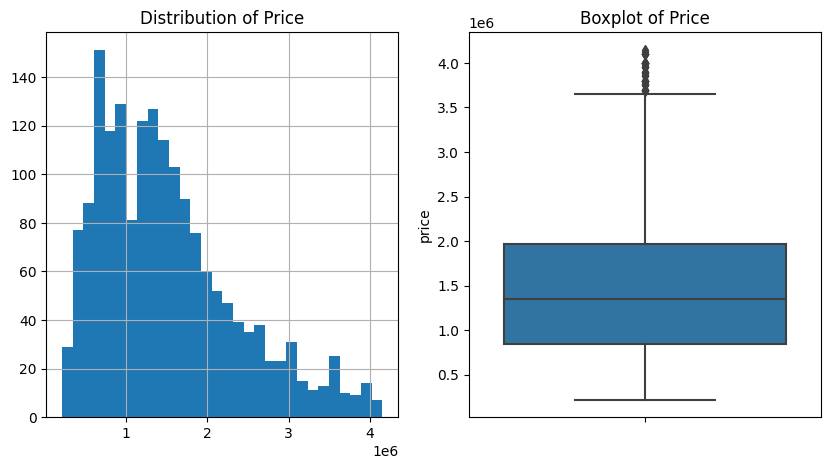

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data['price'].hist(bins=30)
plt.title('Distribution of Price')

plt.subplot(1,2,2)
sns.boxplot(y=data['price'])
plt.title('Boxplot of Price')
plt.show()

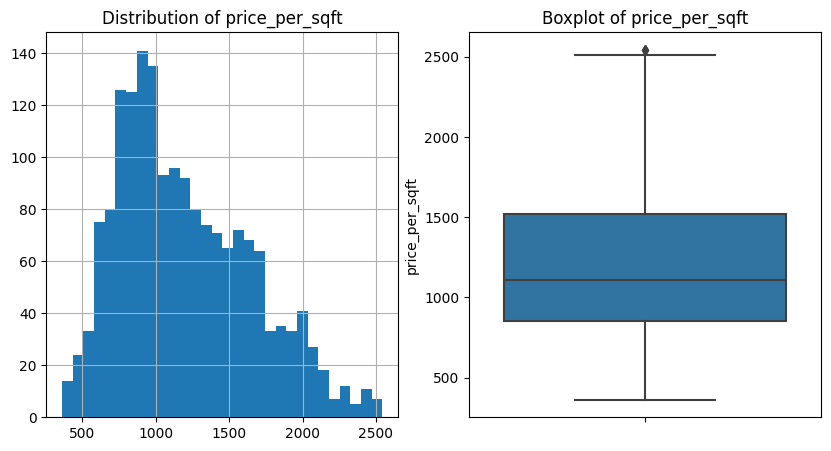

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data['price_per_sqft'].hist(bins=30)
plt.title('Distribution of price_per_sqft')

plt.subplot(1,2,2)
sns.boxplot(y=data['price_per_sqft'])
plt.title('Boxplot of price_per_sqft')
plt.show()

In [76]:
print('min: ', data['price'].min())
print('max: ', data['price'].max())
print('mean: ', data['price'].mean())
print('median: ', data['price'].median())

min:  220000
max:  4150000
mean:  1509293.450199203
median:  1350000.0


In [69]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Splitting the data into features (X) and target (y)
X_price = data.drop(['price', 'price_per_sqft'], axis=1)
y_price = data['price']

# Identifying categorical features
cat_features = X_price.select_dtypes(include=['object', 'bool']).columns.tolist()

# Splitting the data into train and test sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with 8 cores
model_price = CatBoostRegressor(iterations=5000, loss_function='RMSE', random_seed=42)

# Fit model
model_price.fit(X_train_price, y_train_price, cat_features=cat_features, eval_set=(X_test_price, y_test_price))

# Get predictions
preds_price = model_price.predict(X_test_price)

Learning rate set to 0.020124
0:	learn: 831070.9576472	test: 842958.3400755	best: 842958.3400755 (0)	total: 2.67ms	remaining: 13.4s
1:	learn: 821897.7743431	test: 834089.1745092	best: 834089.1745092 (1)	total: 6.62ms	remaining: 16.5s
2:	learn: 812579.3068280	test: 824937.6014507	best: 824937.6014507 (2)	total: 8.76ms	remaining: 14.6s
3:	learn: 802820.2816667	test: 815491.4960946	best: 815491.4960946 (3)	total: 12.2ms	remaining: 15.3s
4:	learn: 793959.5360989	test: 806893.1335364	best: 806893.1335364 (4)	total: 15.1ms	remaining: 15.1s
5:	learn: 784392.4375458	test: 797378.9224885	best: 797378.9224885 (5)	total: 17.1ms	remaining: 14.3s
6:	learn: 775523.9208032	test: 788717.8394637	best: 788717.8394637 (6)	total: 18.7ms	remaining: 13.4s
7:	learn: 767326.2516312	test: 780847.5226190	best: 780847.5226190 (7)	total: 20.6ms	remaining: 12.8s
8:	learn: 758884.6993013	test: 772668.1119377	best: 772668.1119377 (8)	total: 23ms	remaining: 12.8s
9:	learn: 751685.5191031	test: 765469.0471430	best: 76

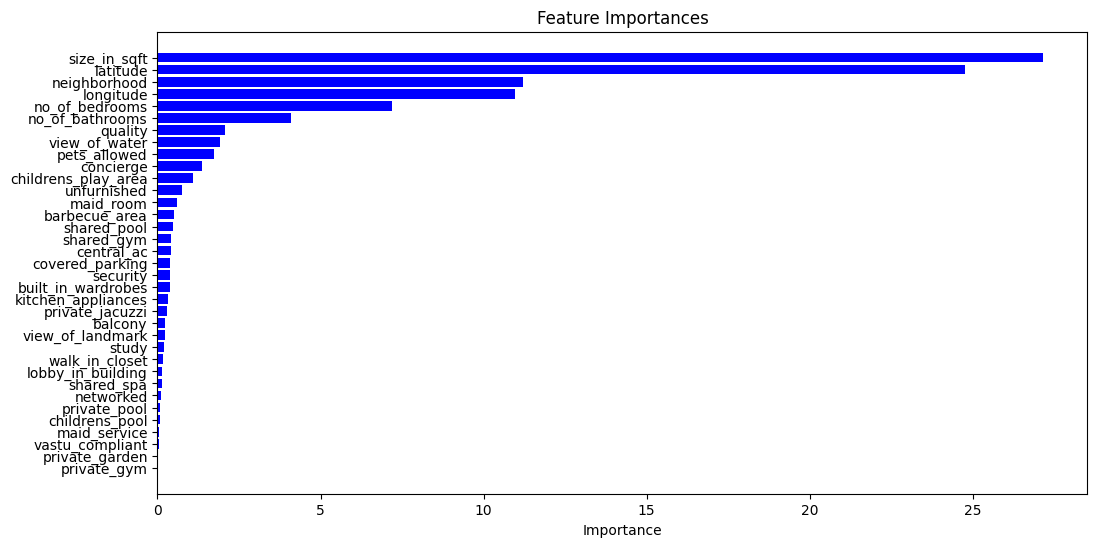

In [71]:
# Get feature importances
feature_importances = model_price.get_feature_importance()

# Create a pandas DataFrame for easier manipulation
feature_importances_data = pd.DataFrame(list(zip(X_price.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort values by importance
feature_importances_data = feature_importances_data.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importances_data['Feature'], feature_importances_data['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_price, preds_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_price, preds_price)
r2 = r2_score(y_test_price, preds_price)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 111930953519.7621
RMSE: 334560.83679917187
MAE: 235138.45424670167
R²: 0.8456357569855777


In [88]:
y_test_price[:5].round()

id
7657237    1600000
7650806     660600
7680951    2100000
7685275    3125000
7524528    3900000
Name: price, dtype: int64

In [87]:
preds_price[:5].round()

array([1739350.,  608430., 1953766., 2304640., 3704298.])

In [73]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Splitting the data into features (X) and target (y)
X_price_per_sqft = data.drop(['price', 'price_per_sqft'], axis=1)
y_price_per_sqft = data['price_per_sqft']

# Identifying categorical features
cat_features = X_price_per_sqft.select_dtypes(include=['object', 'bool']).columns.tolist()

# Splitting the data into train and test sets
X_train_price_per_sqft, X_test_price_per_sqft, y_train_price_per_sqft, y_test_price_per_sqft = train_test_split(X_price_per_sqft, y_price_per_sqft, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with 8 cores
model_price_per_sqft = CatBoostRegressor(iterations=5000, loss_function='RMSE', random_seed=42)

# Fit model
model_price_per_sqft.fit(X_train_price_per_sqft, y_train_price_per_sqft, cat_features=cat_features, eval_set=(X_test_price_per_sqft, y_test_price_per_sqft))

# Get predictions
preds_price_per_sqft = model_price_per_sqft.predict(X_test_price_per_sqft)

Learning rate set to 0.020124
0:	learn: 449.6782946	test: 437.0043356	best: 437.0043356 (0)	total: 3ms	remaining: 15s
1:	learn: 446.1856496	test: 433.8979822	best: 433.8979822 (1)	total: 7.25ms	remaining: 18.1s
2:	learn: 442.9900840	test: 431.4035413	best: 431.4035413 (2)	total: 9.7ms	remaining: 16.1s
3:	learn: 439.6661275	test: 428.3470803	best: 428.3470803 (3)	total: 11.9ms	remaining: 14.9s
4:	learn: 436.5847034	test: 425.7319910	best: 425.7319910 (4)	total: 14.3ms	remaining: 14.3s
5:	learn: 433.6478137	test: 423.5106245	best: 423.5106245 (5)	total: 16.4ms	remaining: 13.6s
6:	learn: 431.1181927	test: 421.5237172	best: 421.5237172 (6)	total: 18.3ms	remaining: 13.1s
7:	learn: 428.4943875	test: 419.7271931	best: 419.7271931 (7)	total: 21.3ms	remaining: 13.3s
8:	learn: 425.8077676	test: 417.9549918	best: 417.9549918 (8)	total: 22.8ms	remaining: 12.7s
9:	learn: 422.5739519	test: 415.1982307	best: 415.1982307 (9)	total: 24.4ms	remaining: 12.2s
10:	learn: 419.7842361	test: 413.0380029	best:

In [ ]:
print('min: ', data['price_per_sqft'].min())
print('max: ', data['price_per_sqft'].max())
print('mean: ', data['price_per_sqft'].mean())

min:  361.87
max:  2543.55
mean:  1199.1298178713716


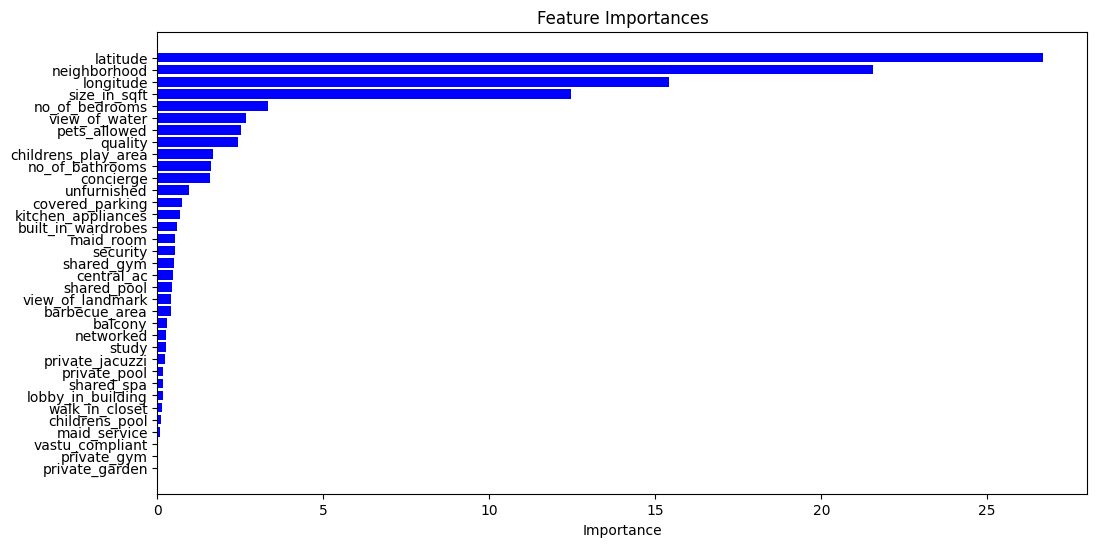

In [74]:
# Get feature importances
feature_importances = model_price_per_sqft.get_feature_importance()

# Create a pandas DataFrame for easier manipulation
feature_importances_data = pd.DataFrame(list(zip(X_price_per_sqft.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort values by importance
feature_importances_data = feature_importances_data.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importances_data['Feature'], feature_importances_data['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_price_per_sqft, preds_price_per_sqft)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_price_per_sqft, preds_price_per_sqft)
r2 = r2_score(y_test_price_per_sqft, preds_price_per_sqft)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 57384.56053389274
RMSE: 239.5507473039747
MAE: 179.41167139993547
R²: 0.7013348558178432
